# 1- Basic Pandas usage 
As always, let's start by importing pandas.

In [2]:
import pandas as pd

Let's start by creating a ```dataframe``` from a dictionary.  Let's initialize this dictionary with some Lennard-Jones fitting parameters for alkanes from opls.

In [3]:
lj_dict = {'name' : ['opls_135', 'opls_136', 'opls_140'],
           'element' : ['C', 'C', 'H'],
           'def' : ['[C;X4](C)(H)(H)H', '[C;X4](C)(C)(H)H', 'H[C;X4]'],
           'epsilon' : [0.35,0.35,0.25],
           'sigma' : [0.276144,0.276144,0.12552],
           'charge' : [-0.18,-0.12,0.06]
}

lj_df = pd.DataFrame(lj_dict)

Simply calling the dataframe provides a nicely formatted table in jupyter; using '''print''' outputs the same data, but in a monospaced type format.

In [4]:
lj_df

,name,element,def,epsilon,sigma,charge
0,opls_135,C,[C;X4](C)(H)(H)H,0.35,0.276144,-0.18
1,opls_136,C,[C;X4](C)(C)(H)H,0.35,0.276144,-0.12
2,opls_140,H,H[C;X4],0.25,0.125520,0.06


In [5]:
print(lj_df)

       name element               def  epsilon     sigma  charge
0  opls_135       C  [C;X4](C)(H)(H)H     0.35  0.276144   -0.18
1  opls_136       C  [C;X4](C)(C)(H)H     0.35  0.276144   -0.12
2  opls_140       H           H[C;X4]     0.25  0.125520    0.06


One can easily index the dataframe. If we index using single square brackets it returns the series, whereas if we do double square brackets we get a Pandas dataframe (this difference is obvious in Jupyter notebooks, because the dataframe will be rendered in a nicer format).  

In [9]:
lj_df['name']

0    opls_135
1    opls_136
2    opls_140
Name: name, dtype: object

In [10]:
type(lj_df['name'])

pandas.core.series.Series

In [7]:
lj_df[['name']]

,name
0,opls_135
1,opls_136
2,opls_140


In [11]:
type(lj_df[['name']])

pandas.core.frame.DataFrame

Simple logical operations can be performed and then used to extract the individual row (i.e., series) of interest.

In [12]:
lj_df['name'] == 'opls_135'

0     True
1    False
2    False
Name: name, dtype: bool

In [13]:
lj_df[lj_df['name'] == 'opls_135']

,name,element,def,epsilon,sigma,charge
0,opls_135,C,[C;X4](C)(H)(H)H,0.35,0.276144,-0.18


The numerical index can also be used to extract a specific row.

In [16]:
lj_df[0:1]

,name,element,def,epsilon,sigma,charge
0,opls_135,C,[C;X4](C)(H)(H)H,0.35,0.276144,-0.18


The ```iloc``` command can also be used to index a specific row.

In [29]:
lj_df.iloc[0]

name               opls_135
element                   C
def        [C;X4](C)(H)(H)H
epsilon                0.35
sigma              0.276144
charge                -0.18
Name: 0, dtype: object

After identifying the row of interest, the column labels can be used to index the data.

In [22]:
lj_df[lj_df['name'] == 'opls_135']['def']

0    [C;X4](C)(H)(H)H
Name: def, dtype: object

In [23]:
lj_df[0:1]['def']

0    [C;X4](C)(H)(H)H
Name: def, dtype: object

In [24]:
lj_df.iloc[0]['def']

'[C;X4](C)(H)(H)H'

In [25]:
lj_df.iloc[0][2]

'[C;X4](C)(H)(H)H'

Let's do something slightly useful with this data, e.g., plotting the LJ potentials.

In [26]:
import matplotlib
from matplotlib import pyplot as plt


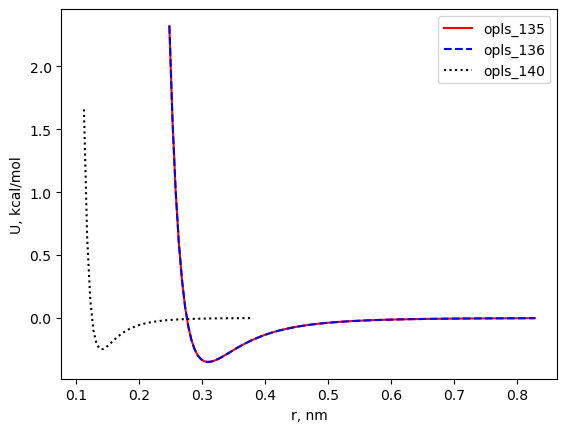

In [35]:
def LJ(epsilon=1.0, sigma=1.0, dr=0.005, rmin=0.9):
    r = rmin
    while 1:
        U = 4.0*epsilon*((sigma/r)**12 - (sigma/r)**6)
        yield U,r
        r = r + dr

color = ['red', 'blue', 'black']
line = ['-', '--', ':']

empty = {}
for i in range(0,len(lj_df)):
    pot = []
    dist = []
    for U,r in LJ(epsilon=lj_df.iloc[i]['epsilon'], sigma=lj_df.iloc[i]['sigma'], rmin=0.9*lj_df.iloc[i]['sigma']):
        pot.append(U)
        dist.append(r)
        if r > 3.0*lj_df.iloc[i]['sigma']:            
            break
    
    plt.plot(dist,pot,label=lj_df.iloc[i]['name'],c=color[i], ls=line[i])
    plt.legend(loc='upper right')
    plt.xlabel('r, nm')
    plt.ylabel('U, kcal/mol')




## Reading and writing CSV files

Let us generate some ficticious data, save it as a dictionary, and set up a simple dataframe. 

In [111]:
import random

data_dict = {'time': [], 'U': []}
r = 0.9
 
for i in range (0,10):
    data_dict['U'].append(random.gauss(mu=3.0, sigma=0.7))
    data_dict['time'].append(i)
    

In [112]:
data_df = pd.DataFrame(data_dict)

In [113]:
data_df

,time,U
0,0,3.338765
1,1,2.586412
2,2,4.397756
3,3,2.375504
4,4,2.533217
5,5,3.277320
6,6,4.443417
7,7,2.343107
8,8,2.388793
9,9,1.706599


To save to csv, we can just use the built in ```to_csv``` function.

In [114]:
data_df.to_csv('random_data.csv', index=False)

Reading a csv file is effectively the same. Since we did not write an index column, pandas will automatically generate one based on the numerical index of the line. 

In [115]:
data_read_df = pd.read_csv('random_data.csv')

In [116]:
data_read_df

,time,U
0,0,3.338765
1,1,2.586412
2,2,4.397756
3,3,2.375504
4,4,2.533217
5,5,3.277320
6,6,4.443417
7,7,2.343107
8,8,2.388793
9,9,1.706599
